In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train=pd.read_csv('Training_Set.csv')
validation=pd.read_csv('Validation_Set.csv')

In [ ]:
train.columns

Index(['Attribute 1 (a1)', 'Attribute 2 (a2)', 'Class Label'], dtype='object')

In [ ]:
train['Attribute 1 (a1)'].value_counts()

12    5
10    5
8     5
6     5
4     5
2     5
Name: Attribute 1 (a1), dtype: int64

In [ ]:
train['Attribute 2 (a2)'].value_counts()

27    6
15    6
13    6
11    6
39    6
Name: Attribute 2 (a2), dtype: int64

In [ ]:
train['Class Label'].value_counts()

2    15
1    15
Name: Class Label, dtype: int64

In [ ]:
train['Class Label']=train['Class Label'].astype('category')

In [ ]:
validation.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,35,1,1,NaN,NaN,NaN
1,12,13,2,1,NaN,NaN,NaN
2,-4,45,2,2,NaN,NaN,NaN
3,2,17,2,2,NaN,NaN,NaN


In [ ]:
validation.columns

Index(['Attribute 1 (a1)', 'Attribute 2 (a2)', 'True Class Label',
       'Class Label as predicted by the decision tree', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [ ]:
validation=validation[['Attribute 1 (a1)', 'Attribute 2 (a2)', 'True Class Label',
       'Class Label as predicted by the decision tree']]

In [ ]:
validation.head(10)

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree
0,2,35,1,1
1,12,13,2,1
2,-4,45,2,2
3,2,17,2,2


In [ ]:
VTEST=validation[['Attribute 1 (a1)', 'Attribute 2 (a2)']]
True_class_label=validation['True Class Label']
Predicted_class_label=validation[['Class Label as predicted by the decision tree']]

In [ ]:
VTEST.head()

,Attribute 1 (a1),Attribute 2 (a2)
0,2,35
1,12,13
2,-4,45
3,2,17


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Attribute 1 (a1)  30 non-null     int64   
 1   Attribute 2 (a2)  30 non-null     int64   
 2   Class Label       30 non-null     category
dtypes: category(1), int64(2)
memory usage: 734.0 bytes


In [ ]:

X = train.drop('Class Label',axis=1)

Y = train['Class Label']


In [ ]:

from sklearn.tree import DecisionTreeClassifier


dt_default = DecisionTreeClassifier(max_depth=20,min_samples_split = 10,min_samples_leaf = 5,criterion='gini')
dt_default.fit(X, Y)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10)

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_default = dt_default.predict(VTEST)

print(classification_report(True_class_label, y_pred_default))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



In [ ]:

print(confusion_matrix(True_class_label, y_pred_default))
print(accuracy_score(True_class_label, y_pred_default))

[[0 1]
 [2 1]]
0.25


In [ ]:

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:

features = list(train.columns[:-1])
features

['Attribute 1 (a1)', 'Attribute 2 (a2)']

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz/bin/'

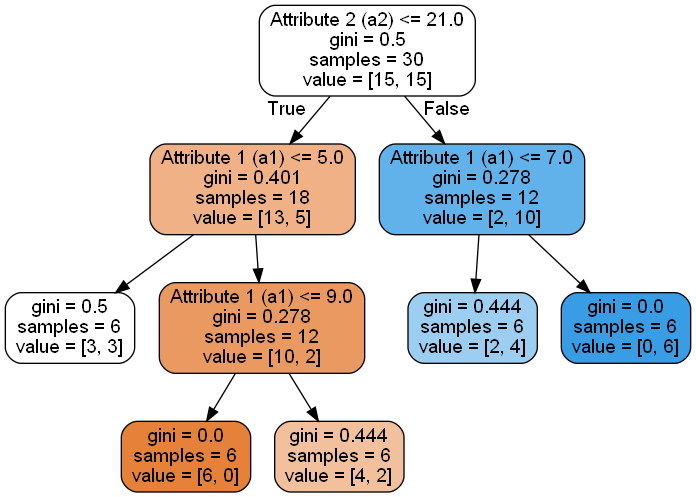

In [ ]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())